In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
file= r'/content/drive/My Drive/AdSmartABdata.csv'
import pandas as pd
data = pd.read_csv(file)

##Import libraries

In [ ]:
%matplotlib inline
import statsmodels.api as sm
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy.stats as scs
sns.set()

##Data visualization

In [ ]:
data.shape

(8077, 9)

In [ ]:
data.head()

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
0,0008ef63-77a7-448b-bd1e-075f42c55e39,exposed,2020-07-10,8,Generic Smartphone,6,Chrome Mobile,0,0
1,000eabc5-17ce-4137-8efe-44734d914446,exposed,2020-07-07,10,Generic Smartphone,6,Chrome Mobile,0,0
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1
3,00187412-2932-4542-a8ef-3633901c98d9,control,2020-07-03,15,Samsung SM-A705FN,6,Facebook,0,0
4,001a7785-d3fe-4e11-a344-c8735acacc2c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0


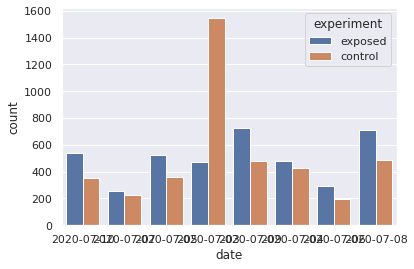

In [ ]:
sns.countplot(x="date",hue="experiment", data=data)

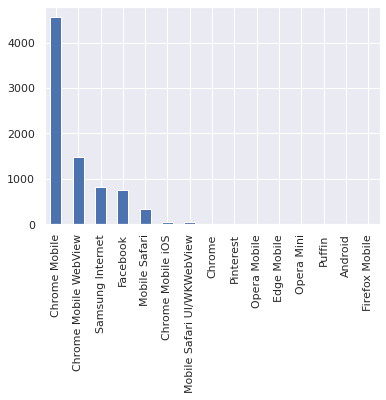

In [ ]:
data['browser'].value_counts().plot.bar()

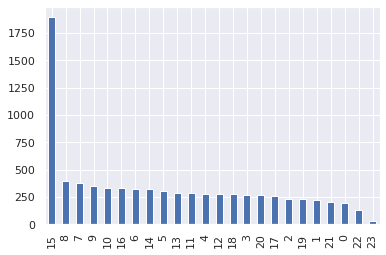

In [ ]:
data['hour'].value_counts().plot.bar()

In [ ]:
#Merge yes and no columns(converted)
a =pd.DataFrame(data[(data['yes']==1)]) 
b =pd.DataFrame(data[(data['no']==1)])
b['no']=0
df= pd.concat([a, b]).sort_index()
df. drop(['no'], axis=1, inplace=True)
df.rename(columns = {'yes':'converted'}, inplace = True) 
df.head()

,auction_id,experiment,date,hour,device_make,platform_os,browser,converted
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0
16,008aafdf-deef-4482-8fec-d98e3da054da,exposed,2020-07-04,16,Generic Smartphone,6,Chrome Mobile,1
20,00a1384a-5118-4d1b-925b-6cdada50318d,exposed,2020-07-06,8,Generic Smartphone,6,Chrome Mobile,0
23,00b6fadb-10bd-49e3-a778-290da82f7a8d,control,2020-07-08,4,Samsung SM-A202F,6,Facebook,1
27,00ebf4a8-060f-4b99-93ac-c62724399483,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0


In [ ]:
#Calculate the users who responded yes & no for each group
control_yes = len((df[(df['converted']==1) & (df['experiment']== "control" )]).index)
exposed_yes = len((df[(df['converted']==1) & (df['experiment']== "exposed" )]).index)
control_no = len((df[(df['converted']==0) & (df['experiment']== "control" )]).index)
exposed_no = len((df[(df['converted']==0) & (df['experiment']== "exposed" )]).index)

In [ ]:
controled = len((df[(df['experiment']== "control" )]).index) #total number of controlled users
exposed = len((df[(df['experiment']== "exposed" )]).index) #total number of exposed groups

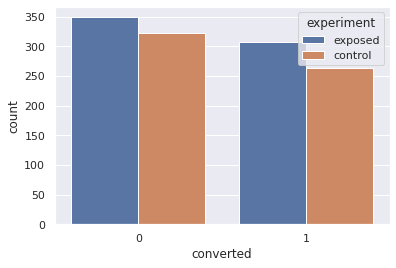

In [ ]:
sns.countplot(x="converted",hue="experiment", data=df)

#A/B testing

In [ ]:
num_a, num_b = controled, exposed
control_yes, exposed_yes = control_yes, exposed_yes
rate_a, rate_b = control_yes / num_a, exposed_yes / num_b

In [ ]:
print(rate_a) #percentage of control group uesrs who responded yes
print(rate_b) #percentage of exposed group uesrs who responded yes

0.45051194539249145
0.4687975646879756


##Binary distribution

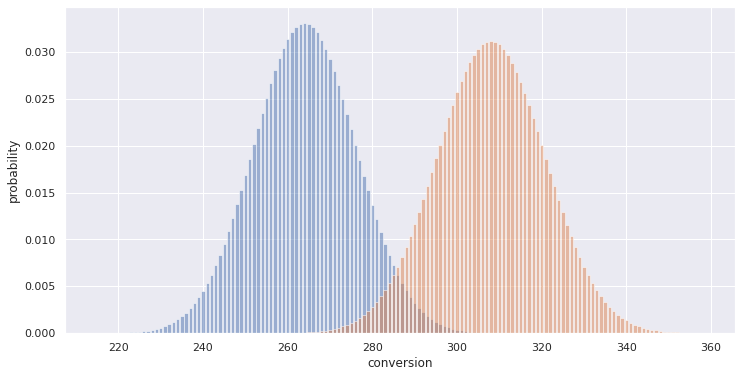

In [ ]:
import matplotlib.pyplot as plt
from scipy.stats import binom
import numpy as np

fig, ax = plt.subplots(figsize=(12,6))

xc = np.linspace(control_yes - 49, control_yes + 50, 100)
yc = scs.binom(controled, rate_a).pmf(xc)
ax.bar(xc, yc, alpha=0.5)

xe = np.linspace(exposed_yes - 49, exposed_yes + 50, 100)
ye = scs.binom(exposed, rate_b).pmf(xe)
ax.bar(xe, ye, alpha=0.5)

plt.xlabel('conversion')
plt.ylabel('probability')
plt.show()

##Normalization

Text(0, 0.5, 'PDF')

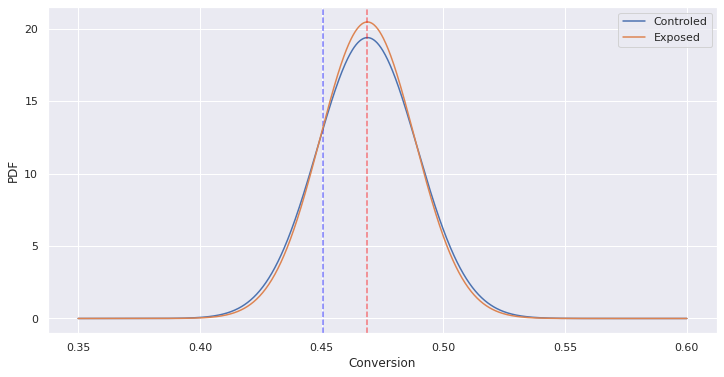

In [ ]:
from scipy.stats import norm

# standard error of the mean for both groups
SE_control = np.sqrt(rate_a * (1-rate_a)) / np.sqrt(controled)
SE_exposed = np.sqrt(rate_b * (1-rate_b)) / np.sqrt(exposed)

fig, ax = plt.subplots(figsize=(12,6))

x = np.linspace(.35, .6, 1000)

yc = scs.norm(rate_b, SE_control).pdf(x)
ax.plot(x, yc, label='Controled')
ax.axvline(x=rate_a, c='blue', alpha=0.5, linestyle='--')

ye = scs.norm(rate_b, SE_exposed).pdf(x)
ax.plot(x, ye, label='Exposed')
ax.axvline(x=rate_b, c='red', alpha=0.5, linestyle='--')

plt.legend()
plt.xlabel('Conversion')
plt.ylabel('PDF')

zscore is 0.646, with p-value 0.259


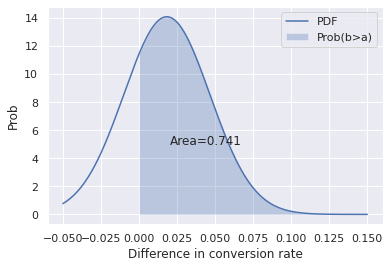

In [ ]:
std_a = np.sqrt(rate_a * (1 - rate_a) / num_a)
std_b = np.sqrt(rate_b * (1 - rate_b) / num_b)
z_score = (rate_b - rate_a) / np.sqrt(std_a**2 + std_b**2)
p = norm(rate_b - rate_a, np.sqrt(std_a**2 + std_b**2))

x = np.linspace(-0.05, 0.15, 1000)
y = p.pdf(x)
area_under_curve = p.sf(0)
plt.plot(x, y, label="PDF")
plt.fill_between(x, 0, y, where=x>0, label="Prob(b>a)", alpha=0.3)
plt.annotate(f"Area={area_under_curve:0.3f}", (0.02, 5))
plt.legend()
plt.xlabel("Difference in conversion rate"); plt.ylabel("Prob");

print(f"zscore is {z_score:0.3f}, with p-value {norm().sf(z_score):0.3f}")